In [1]:
import sympy as sym
import numpy as np
import cloudpickle

In [2]:
m = [0]*3

with open("steady-state.pkl", "rb") as f:
    m[1] = cloudpickle.load(f)
    
with open("accel.pkl", "rb") as f:
    m[0] = cloudpickle.load(f)
    
with open("decel.pkl", "rb") as f:
    m[2] = cloudpickle.load(f)
    
    
N = m[0].N[-1]

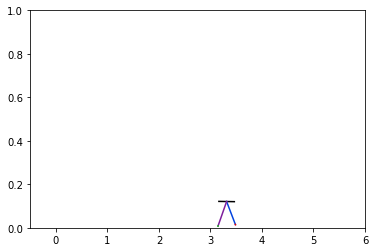

In [3]:
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes
#ax1.set_aspect('equal')
p = 0
adder = 0
def plot_robot(i,m,ax): #update function for animation
    global p, adder
    ax.clear()
    ax.set_xlim([-0.5,6])
    ax.set_ylim([0,1])
    
    if(i%(N+1) == 0):
        i += 1
        p += 1
        if(p>0):
            adder += m[p-1].q0[N,'x'].value
    
    #plot body
    body_xb = m[p].q0[i%(N+1),'x'].value - 0.5*m[p].lb*np.cos(m[p].q0[i%(N+1),'theta_b'].value) + adder
    body_yb = m[p].q0[i%(N+1),'z'].value - 0.5*m[p].lb*np.sin(m[p].q0[i%(N+1),'theta_b'].value)
    body_xf = m[p].q0[i%(N+1),'x'].value + 0.5*m[p].lb*np.cos(m[p].q0[i%(N+1),'theta_b'].value) + adder
    body_yf = m[p].q0[i%(N+1),'z'].value + 0.5*m[p].lb*np.sin(m[p].q0[i%(N+1),'theta_b'].value)  
    ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:black')

    # left--------------------------------------------------------------------------------------------------
    #plot leg 
    leg_xt1_L = m[p].q0[i%(N+1),'x'].value + adder
    leg_yt1_L = m[p].q0[i%(N+1),'z'].value 
    leg_xb1_L = m[p].q0[i%(N+1),'x'].value + m[p].ll1*np.cos(m[p].q0[i%(N+1),'theta_l_L'].value) + adder
    leg_yb1_L = m[p].q0[i%(N+1),'z'].value - m[p].ll1*np.sin(m[p].q0[i%(N+1),'theta_l_L'].value)
    ax.plot([leg_xt1_L,leg_xb1_L],[leg_yt1_L,leg_yb1_L],color='xkcd:blue')

    #plot leg 
    leg_xt2_L = m[p].q0[i%(N+1),'x'].value + m[p].ll2*np.cos(m[p].q0[i%(N+1),'theta_l_L'].value) + adder
    leg_yt2_L = m[p].q0[i%(N+1),'z'].value - m[p].ll2*np.sin(m[p].q0[i%(N+1),'theta_l_L'].value)
    leg_xb2_L = m[p].q0[i%(N+1),'x'].value + (m[p].ll2 + m[p].q0[i%(N+1),'r_L'].value)*np.cos(m[p].q0[i%(N+1),'theta_l_L'].value) + adder
    leg_yb2_L = m[p].q0[i%(N+1),'z'].value - (m[p].ll2 + m[p].q0[i%(N+1),'r_L'].value)*np.sin(m[p].q0[i%(N+1),'theta_l_L'].value)
    ax.plot([leg_xt2_L,leg_xb2_L],[leg_yt2_L,leg_yb2_L],color='xkcd:red')

    # right---------------------------------------------------------------------------------------------------
    #plot leg 
    leg_xt1_R = m[p].q0[i%(N+1),'x'].value + adder
    leg_yt1_R = m[p].q0[i%(N+1),'z'].value 
    leg_xb1_R = m[p].q0[i%(N+1),'x'].value + m[p].ll1*np.cos(m[p].q0[i%(N+1),'theta_l_R'].value) + adder
    leg_yb1_R = m[p].q0[i%(N+1),'z'].value - m[p].ll1*np.sin(m[p].q0[i%(N+1),'theta_l_R'].value) 
    ax.plot([leg_xt1_R,leg_xb1_R],[leg_yt1_R,leg_yb1_R],color='xkcd:purple')

    #plot leg 
    leg_xt2_R = m[p].q0[i%(N+1),'x'].value + m[p].ll2*np.cos(m[p].q0[i%(N+1),'theta_l_R'].value) + adder
    leg_yt2_R = m[p].q0[i%(N+1),'z'].value - m[p].ll2*np.sin(m[p].q0[i%(N+1),'theta_l_R'].value)
    leg_xb2_R = m[p].q0[i%(N+1),'x'].value + (m[p].ll2 + m[p].q0[i%(N+1),'r_R'].value)*np.cos(m[p].q0[i%(N+1),'theta_l_R'].value) + adder
    leg_yb2_R = m[p].q0[i%(N+1),'z'].value - (m[p].ll2 + m[p].q0[i%(N+1),'r_R'].value)*np.sin(m[p].q0[i%(N+1),'theta_l_R'].value)
    ax.plot([leg_xt2_R,leg_xb2_R],[leg_yt2_R,leg_yb2_R],color='xkcd:green')
    
update = lambda i: plot_robot(i,m,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(1,(N+1)*3),interval = 50,repeat=False)

HTML(animate.to_jshtml())
#HTML(animate.to_html5_video())

3 175.20485528426238
19 338.34787188730536
31 -545.4157118589741
43 279.8631383394162
49 -174.99511575375095
36 196.78331321379886
37 171.72659426662378
41 -176.4410197380355
1 268.851347516024
21 170.73218126608182
52 199.6910019431651


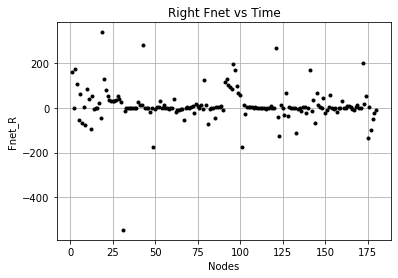

13 164.73776310098708
31 332.11923509000894
41 -245.676250659801
19 194.1856587969284
37 200.23721159175545
1 -258.61934658134186
7 239.99027084842186
28 243.99271911784135
33 177.96717098637416
34 -187.45020154477683
49 -193.27422157110283


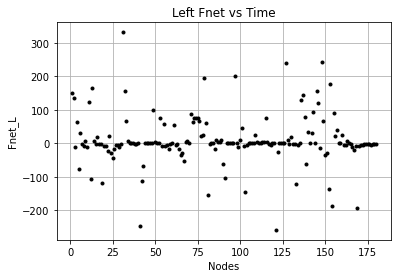

In [18]:
plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_R = m[i].F_max*(m[i].Fbang_pos_R[n].value - m[i].Fbang_neg_R[n].value) - m[i].dq0[n,'r_R'].value*m[i].damping - m[i].FhardStop_ext_R[n].value + m[i].FhardStop_rtn_R[n].value
        time = m[i].tt0[n].value
        Time += time
        if(Fnet_R >= m[0].F_max or Fnet_R <= -m[0].F_max):
            print(n, Fnet_R)
        plt.plot(N*i+n,Fnet_R,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_R')
        plt.title('Right Fnet vs Time')
plt.show()

plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_L = m[i].F_max*(m[i].Fbang_pos_L[n].value - m[i].Fbang_neg_L[n].value) - m[i].dq0[n,'r_L'].value*m[i].damping - m[i].FhardStop_ext_L[n].value + m[i].FhardStop_rtn_L[n].value
        time = m[i].tt0[n].value
        Time += time
        if(Fnet_L >= m[0].F_max or Fnet_L <= -m[0].F_max):
            print(n, Fnet_L)
        plt.plot(N*i+n,Fnet_L,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_L')
        plt.title('Left Fnet vs Time')
plt.show()

2.5471677481298993
2.5251436105265124
2.4906435869827126
2.4521133528863603
2.4487681870510754
2.41882328023457
2.3881731271005595
2.3583109388033785
2.3291715219570803
2.2995898470409926
2.269689300831578
2.2350450852876973
2.20656035016632
2.1714998835812502
2.137221699253717
2.1049213074813498
2.0738500045633335
2.045221590152725
2.0192317058190237
2.0419236908929883
2.0644088072025824
2.0876842478166893
2.1119204798824627
2.1346759660172205
2.13699617431827
2.139545131035507
2.1431373876666813
2.1514665247773834
2.18510073059246
2.217204946846627
2.244768333095352
2.246814174950103
2.248243905499339
2.249406171997158
2.250490784492698
2.2611481877326027
2.271689136866661
2.2822054860523946
2.2928847826864507
2.3009347393788144
2.3020555637050903
2.3035955677132365
2.3094136683021147
2.3368828234055394
2.3395657209758776
2.3655392667365858
2.3900978855631236
2.413514507352282
2.4361329795328848
2.454149874527115
2.4567250454308214
2.4750208805623353
2.4942350880740816
2.511236248476

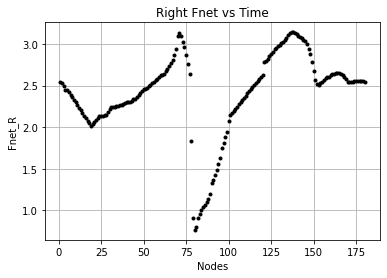

0.5550738903529671
0.6267617041440383
0.6484900259833695
0.6747557158004714
0.6789709360359963
0.7197046531842608
0.7639835121967878
0.8056418636734473
0.8420669295085359
0.8523262893313834
0.8215027860360328
0.7850428397568122
0.7442867260298779
0.7060866688697006
0.6703841605442513
0.6372781413038121
0.6068568090065114
0.5802522371948992
0.5543142103423927
0.5591617908536288
0.6023972681261955
0.663760646559237
0.7368006285490107
0.8171088082307122
0.8243965561212999
0.8274223157965749
0.830373477469705
0.8360282042832116
0.8549468542822224
0.8791080137673793
0.9100321593925966
0.9125483360461465
0.9143184108001736
0.9160534619388491
0.9177742936835761
0.9355359247156406
0.9543845178238155
0.974046833816034
0.9943418037430714
1.009431432692607
1.0115222962023391
1.013660935963157
1.019451655023945
1.054566889468019
1.0582256884479766
1.0957340775520412
1.134422410752208
1.173217870711982
1.2125766908275102
1.2430171719533925
1.2471180142518372
1.2745371713367615
1.2993003946271513
1.

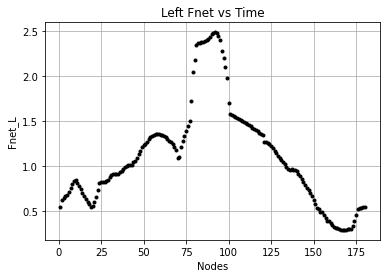

In [12]:
plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_R = m[i].q0[n, 'theta_l_R'].value
        time = m[i].tt0[n].value
        Time += time
        plt.plot(N*i+n,Fnet_R,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_R')
        plt.title('Right Fnet vs Time')
plt.show()

plt.axes()
plt.grid(True)
Time = 0
for i in range(0,3):
    for n in range (1,N+1):
        Fnet_L = m[i].q0[n, 'theta_l_L'].value
        time = m[i].tt0[n].value
        Time += time
        plt.plot(N*i+n,Fnet_L,'k.')
        plt.xlabel('Nodes')
        plt.ylabel('Fnet_L')
        plt.title('Left Fnet vs Time')
plt.show()